In [346]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
sns.set(color_codes=True)

%matplotlib inline

In [347]:
with open("df_pre.pkl", 'rb') as picklefile: 
    df_pre = pickle.load(picklefile)
    

In [348]:
df_pre

,calories,carbohydrates,protein,rating,serving,url,cholesterol,sodium,reviews_count,make_it_again,...,Mussel,Clam,Ground Lamb,Paprika,Beer,Fig,Sesame,Halibut,Chestnut,success_score
"""Bloody Mary"" Tomato Toast with Celery and Horseradish",190,10,2,4.0,6,https://www.epicurious.com/recipes/food/views/...,6,344,2,1.00,...,0,0,0,0,0,0,0,0,0,4.000
"""Nextover"" Chicken Tacos with Quick Refried Beans",1224,65,65,3.0,2,https://www.epicurious.com/recipes/food/views/...,292,1632,3,0.67,...,0,0,0,0,0,0,0,0,0,2.010
10-Minute Chicken Flatbreads with Hummus and Yogurt,463,42,35,3.5,4,https://www.epicurious.com/recipes/food/views/...,115,917,6,0.83,...,0,0,0,0,0,0,0,0,0,2.905
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,476,20,22,4.0,4,https://www.epicurious.com/recipes/food/views/...,70,1046,11,1.00,...,0,0,0,0,0,0,0,0,0,4.000
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,482,18,30,2.5,4,https://www.epicurious.com/recipes/food/views/...,230,1189,3,1.00,...,0,0,0,0,0,0,0,0,0,2.500
3-Ingredient Buffalo Grilled Chicken Wings,569,1,40,4.0,4,https://www.epicurious.com/recipes/food/views/...,282,682,1,1.00,...,0,0,0,0,0,0,0,0,0,4.000
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),736,89,35,2.0,4,https://www.epicurious.com/recipes/food/views/...,66,922,5,0.60,...,0,0,0,0,0,0,0,0,0,1.200
3-Ingredient Chicken Breasts Stuffed with Ham and Cheese,467,2,64,3.0,4,https://www.epicurious.com/recipes/food/views/...,213,669,4,0.75,...,0,0,0,0,0,0,0,0,0,2.250
3-Ingredient Chipotle-Lime Grilled Steak,353,3,36,3.0,4,https://www.epicurious.com/recipes/food/views/...,116,504,6,1.00,...,0,0,0,0,0,0,0,0,0,3.000
3-Ingredient Creamy Pumpkin Pasta,694,91,17,3.0,4,https://www.epicurious.com/recipes/food/views/...,102,508,1,1.00,...,0,0,0,0,0,0,0,0,0,3.000


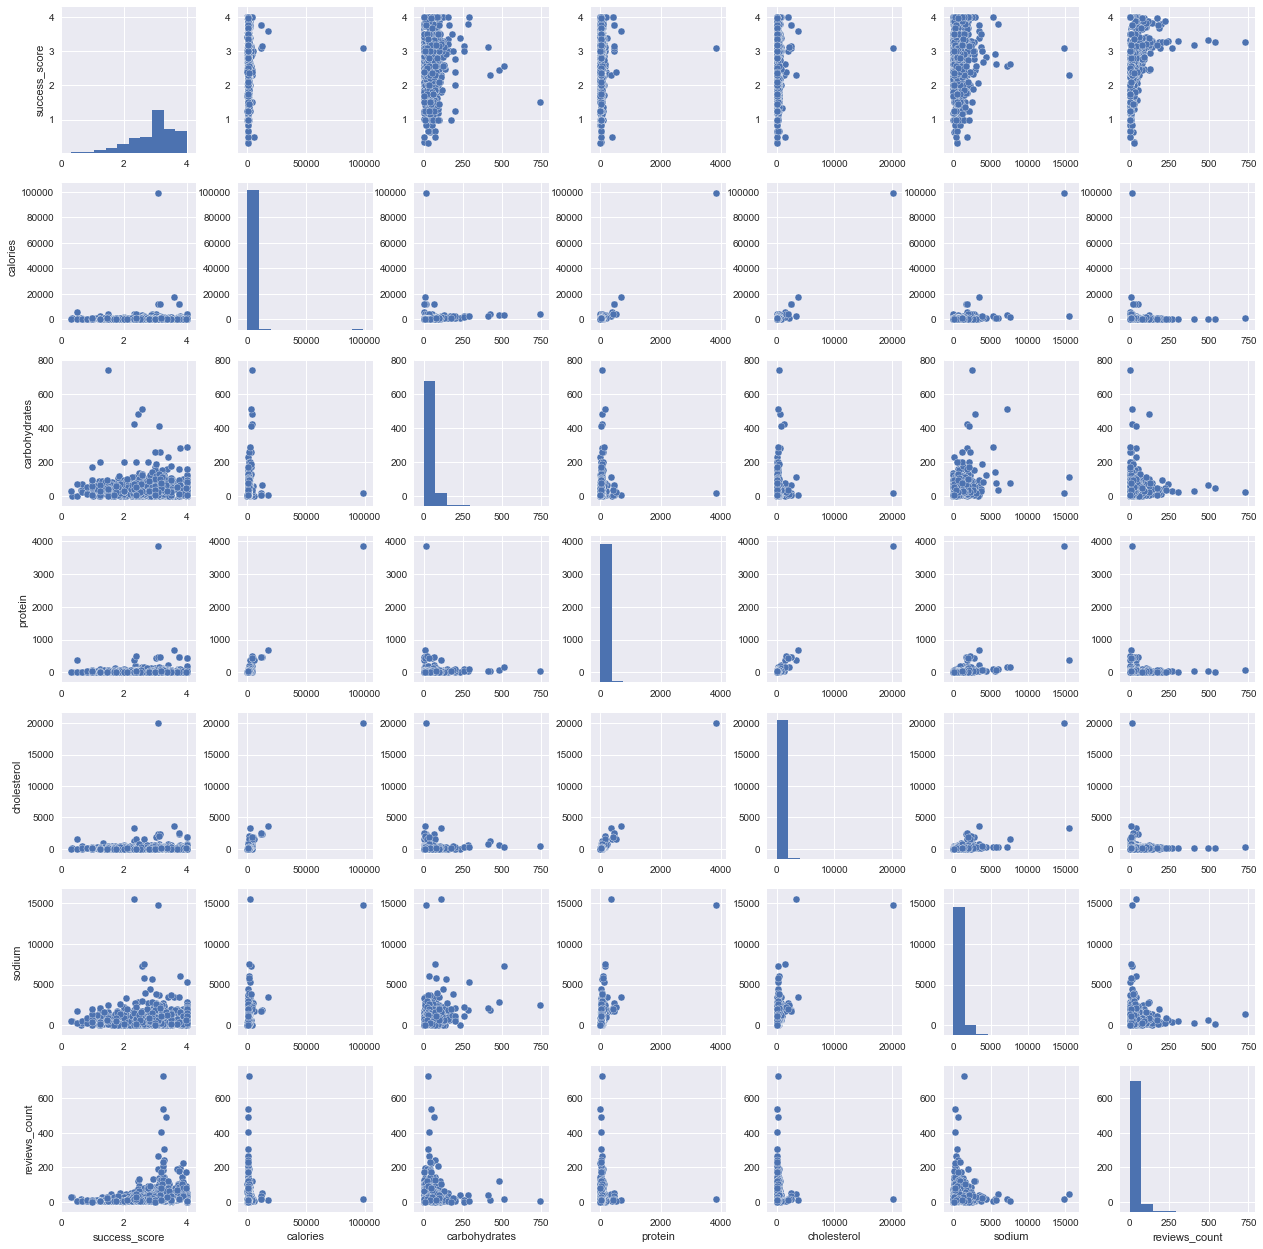

In [349]:
sns.pairplot(df[['success_score','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count']])

## Features Selection

In [350]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
X = df_pre.drop(['rating','url','date','make_it_again','success_score'], axis =1)
y = df_pre['rating']

model = LinearRegression()
# create the RFE model and select 90 features
rfe = RFE(model, 90)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
selected_features_ranking = list(zip(X.columns,rfe.support_,rfe.ranking_))


In [351]:
#create a new dataframe with only features selected by RFE
selected_features = [i[0] for i in selected_features_ranking if i[1] == True]
selected_features_df = pd.DataFrame()
for i in selected_features:
    selected_features_df[i] = df_pre[i]
    

In [352]:
df = pd.merge(df_pre[['success_score','rating','url','calories', 'carbohydrates', 'protein', 'cholesterol','sodium', 'reviews_count','cooking_time']].reset_index(), selected_features_df.reset_index(), on = 'index', how='inner').set_index('index')
df

,success_score,rating,url,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,...,Orange Juice,Banana,Fruit Juice,Bulgur,Brisket,Vanilla,Mussel,Ground Lamb,Fig,Halibut
index,,,,,,,,,,,,,,,,,,,,,
"""Bloody Mary"" Tomato Toast with Celery and Horseradish",4.000,4.0,https://www.epicurious.com/recipes/food/views/...,190,10,2,6,344,2,15,...,0,0,0,0,0,0,0,0,0,0
"""Nextover"" Chicken Tacos with Quick Refried Beans",2.010,3.0,https://www.epicurious.com/recipes/food/views/...,1224,65,65,292,1632,3,20,...,0,0,0,0,0,0,0,0,0,0
10-Minute Chicken Flatbreads with Hummus and Yogurt,2.905,3.5,https://www.epicurious.com/recipes/food/views/...,463,42,35,115,917,6,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Sausage Skillet with Cherry Tomatoes and Broccolini,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,476,20,22,70,1046,11,10,...,0,0,0,0,0,0,0,0,0,0
10-Minute Shrimp with Green Beans and Creamy Lemon-Dill Dip,2.500,2.5,https://www.epicurious.com/recipes/food/views/...,482,18,30,230,1189,3,10,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Buffalo Grilled Chicken Wings,4.000,4.0,https://www.epicurious.com/recipes/food/views/...,569,1,40,282,682,1,30,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Cacio e Pepe (Pasta With Cheese and Pepper),1.200,2.0,https://www.epicurious.com/recipes/food/views/...,736,89,35,66,922,5,30,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Chicken Breasts Stuffed with Ham and Cheese,2.250,3.0,https://www.epicurious.com/recipes/food/views/...,467,2,64,213,669,4,25,...,0,0,0,0,0,0,0,0,0,0
3-Ingredient Chipotle-Lime Grilled Steak,3.000,3.0,https://www.epicurious.com/recipes/food/views/...,353,3,36,116,504,6,60,...,0,0,0,0,0,0,0,0,0,0


In [354]:
df.describe()


,success_score,rating,calories,carbohydrates,protein,cholesterol,sodium,reviews_count,cooking_time,Egg,...,Orange Juice,Banana,Fruit Juice,Bulgur,Brisket,Vanilla,Mussel,Ground Lamb,Fig,Halibut
count,1517.00000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,...,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,2.96496,3.382004,688.323665,38.027686,33.270929,153.690837,730.007910,25.615030,65.241266,0.097561,...,0.004614,0.004614,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955,0.003955
std,0.71083,0.434251,2667.917096,43.020833,107.602279,564.318168,868.607872,40.831328,62.789297,0.296818,...,0.067795,0.067795,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786,0.062786
min,0.31500,1.000000,25.000000,1.000000,1.000000,0.000000,1.000000,1.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.55500,3.000000,288.000000,13.000000,9.000000,26.000000,247.000000,6.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.08000,3.500000,485.000000,29.000000,23.000000,93.000000,553.000000,14.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.50000,3.500000,730.000000,51.000000,39.000000,183.000000,982.000000,31.000000,60.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.00000,4.000000,98668.000000,741.000000,3840.000000,20077.000000,15504.000000,731.000000,360.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### MVP

In [465]:
X = df['cooking_time']
y = df['calories']

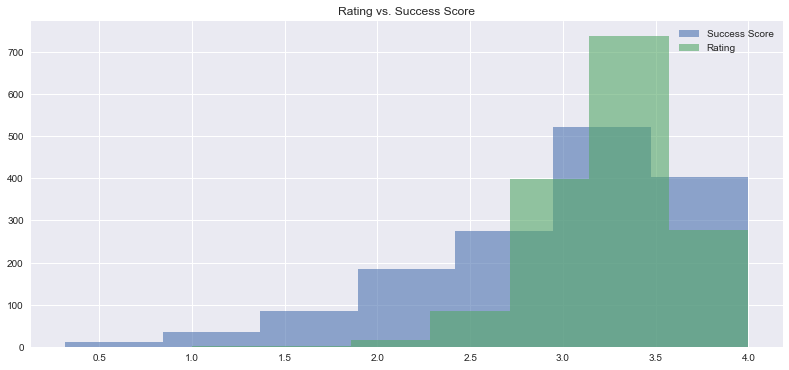

In [618]:
plt.figure(figsize=(12,6))
plt.hist(df['success_score'], bins = 7, alpha=0.6, label='Success Score')
plt.hist(df['rating'], bins = 7, alpha=0.6, label='Rating')
plt.legend(loc='upper right')
plt.title('Rating vs. Success Score')
plt.show()

In [620]:
#log transformation to address skewed data
df1 = df
df['ln_calories'] = np.log(df['calories'])
df['ln_cholesterol'] = np.log(df['cholesterol'])
df['ln_sodium'] = np.log(df['sodium'])

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


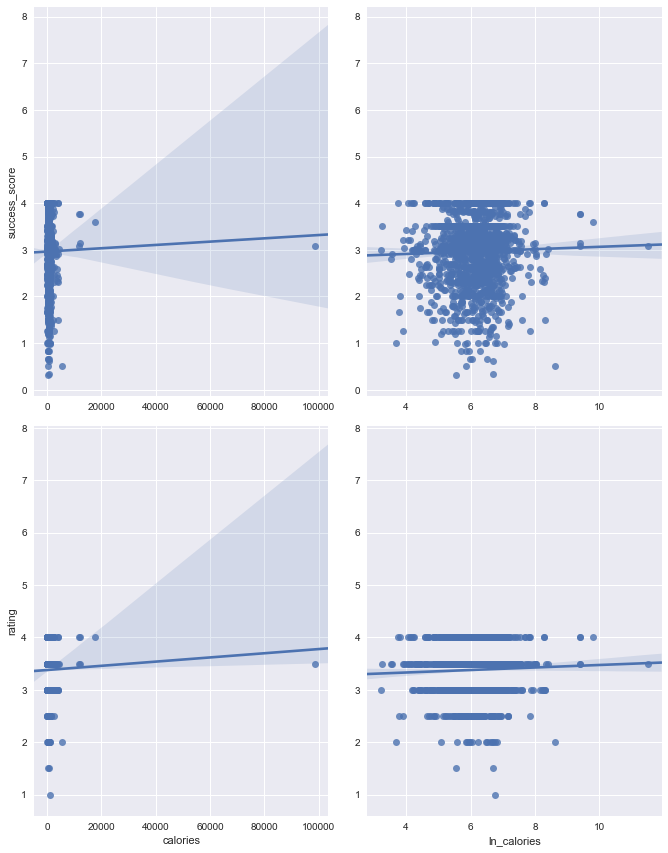

In [638]:
sns.pairplot(df1, x_vars=["calories", 'ln_calories'], y_vars=["success_score", "rating"],
             size=6, aspect=.8, kind="reg");

## Regression Model

### Linear Regression on Basic Features

In [416]:
X = df.drop(['rating','success_score','url'], axis =1)
y = df['success_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
## isolate the features for the training X
X_1 = X_train[['calories', 'carbohydrates', 'protein', 'cholesterol','sodium','cooking_time']]

In [417]:
## Add constant and use StatsModels to generate an OLS regression model
X_1 = sm.add_constant(X_1)
lm1 = sm.OLS(y_train, X_1)
lm1_fit = lm1.fit()
lm1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5435
Date:                Tue, 30 Jan 2018   Prob (F-statistic):              0.775
Time:                        22:08:12   Log-Likelihood:                -1131.6
No. Observations:                1061   AIC:                             2277.
Df Residuals:                    1054   BIC:                             2312.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9807      0.039     77.007      0.000       2.905       3.057
calories      -1.731e-06   4.44e-05     -0.039      0.969   -8.88e-05    8.53e-05
carbohydrates    -0.0007      0.001     -1.062      0.288      -0.002       0.001
protein           0.0012      0.001      1.017      0.309      -0.001       0.004
cholesterol      -0.0002      0.000     -1.033      0.302      -0.001       0.000
sodium         2.125e-05   3.94e-05      0.539      0.590   -5.61e-05    9.86e-05
cooking_time  -9.354e-05      0.000     -0.267      0.790      -0.001       0.001
==============================================================================
Omnibus:                       79.948   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.678
Skew:                          -0.707   Prob(JB):                     1.02e-21
Kurtosis:                       3.436   Cond. No.                     5.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linear Regression on categorical variables for Ingredients

In [418]:
## Exclude basic variables
X_2 = X_train.drop(['calories', 'carbohydrates', 'protein', 'cholesterol', 'sodium', 'reviews_count','cooking_time'], 1)

In [419]:
lm2 = sm.OLS(y_train, X_2)
lm2_fit = lm2.fit()
lm2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     14.81
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          1.06e-128
Time:                        22:08:13   Log-Likelihood:                -2230.8
No. Observations:                1061   AIC:                             4642.
Df Residuals:                     971   BIC:                             5089.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Egg                          1.3556      0.227      5.982      0.000       0.911       1.800
Pork                         1.3704      0.265      5.168      0.000       0.850       1.891
Parmesan                     1.7716      0.303      5.852      0.000       1.178       2.366
Herb                         1.3953      0.319      4.371      0.000       0.769       2.022
Sausage                      1.6147      0.355      4.543      0.000       0.917       2.312
Seafood                      0.1815      0.414      0.439      0.661      -0.631       0.994
Lemon                        1.3556      0.406      3.341      0.001       0.559       2.152
Nut                          1.2045      0.487      2.472      0.014       0.248       2.161
Pepper                       1.3499      0.397      3.403      0.001       0.571       2.128
Shellfish                    1.6323      0.493      3.309      0.001       0.664       2.600
Butter                       1.1638      0.446      2.609      0.009       0.288       2.039
Green Bean                   1.7772      0.446      3.987      0.000       0.903       2.652
Salmon                       2.0979      0.454      4.621      0.000       1.207       2.989
Mint                         1.7729      0.478      3.711      0.000       0.835       2.710
Yogurt                       1.1386      0.501      2.271      0.023       0.155       2.123
Parsley                      1.2288      0.455      2.701      0.007       0.336       2.122
Vinegar                      1.7066      0.457      3.732      0.000       0.809       2.604
Basil                        1.7888      0.436      4.102      0.000       0.933       2.645
Orange                       1.9815      0.463      4.277      0.000       1.072       2.891
Ham                          1.5754      0.479      3.288      0.001       0.635       2.516
Tortillas                    2.3854      0.475      5.019      0.000       1.453       3.318
Chile Pepper                 1.3002      0.555      2.341      0.019       0.210       2.390
Root Vegetable               1.5446      0.496      3.116      0.002       0.572       2.517
Lettuce                      0.7843      0.541      1.449      0.148      -0.278       1.846
Mayonnaise                   1.9203      0.490      3.915      0.000       0.958       2.883
Cheddar                      1.2056      0.537      2.246      0.025       0.152       2.259
Chickpea                     1.6268      0.513      3.169      0.002       0.619       2.634
Almond                      -0.1620      0.614     -0.264      0.792      -1.367       1.043
Raisin                       1.2249      0.624      1.962      0.050      -0.001       2.450
Honey                        1.8393      0.607      3.029      0.003       0.648       3.031
Walnut        

### Linear Regression on all features

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lm3 = sm.OLS(y_train, X_train)
lm3_fit = lm3.fit()
lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          success_score   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     36.62
Date:                Tue, 30 Jan 2018   Prob (F-statistic):          9.36e-261
Time:                        22:08:21   Log-Likelihood:                -1875.9
No. Observations:                1061   AIC:                             3946.
Df Residuals:                     964   BIC:                             4428.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
calories                    -0.0004      0.000     -3.586      0.000      -0.001      -0.000
carbohydrates                0.0124      0.001      8.585      0.000       0.010       0.015
protein                      0.0085      0.003      2.602      0.009       0.002       0.015
cholesterol               7.323e-05      0.001      0.131      0.896      -0.001       0.001
sodium                       0.0004   8.64e-05      4.159      0.000       0.000       0.001
reviews_count                0.0104      0.001      9.236      0.000       0.008       0.013
cooking_time                 0.0104      0.001     14.415      0.000       0.009       0.012
Egg                          0.6481      0.190      3.413      0.001       0.275       1.021
Pork                         0.2109      0.189      1.113      0.266      -0.161       0.583
Parmesan                     0.9357      0.219      4.267      0.000       0.505       1.366
Herb                         0.3924      0.248      1.581      0.114      -0.095       0.879
Sausage                      0.7487      0.261      2.867      0.004       0.236       1.261
Seafood                      0.6003      0.309      1.943      0.052      -0.006       1.207
Lemon                        0.7773      0.248      3.135      0.002       0.291       1.264
Nut                          0.5873      0.312      1.879      0.060      -0.026       1.200
Pepper                       0.9069      0.311      2.916      0.004       0.297       1.517
Shellfish                    0.2443      0.400      0.610      0.542      -0.541       1.030
Butter                       0.6008      0.333      1.805      0.071      -0.052       1.254
Green Bean                   0.7110      0.313      2.268      0.024       0.096       1.326
Salmon                       0.8655      0.322      2.688      0.007       0.234       1.497
Mint                         1.4405      0.344      4.192      0.000       0.766       2.115
Yogurt                       0.2932      0.357      0.820      0.412      -0.408       0.995
Parsley                      0.6832      0.308      2.215      0.027       0.078       1.289
Vinegar                      1.4871      0.351      4.231      0.000       0.797       2.177
Basil                        0.8252      0.378      2.181      0.029       0.083       1.568
Orange                       0.8507      0.342      2.488      0.013       0.180       1.522
Ham                          0.7468      0.347      2.152      0.032       0.066       1.428
Tortillas                    0.6104      0.376      1.623      0.105      -0.128       1.349
Chile Pepper                 0.8350      0.371      2.250      0.025       0.107       1.563
Root Vegetable               0.9671      0.399      2.425      0.015       0.185       1.750
Lettuce       

R^2 = 79%

In [360]:
"""Prob (F-statisic): If p-value < 0.05, we can reject the null hypothesis.
P >|t|: if p-value < 0.05, we can reject the null hypothesis: This variable does contribute to this model
Prob(Omnibus): The p-value for this test. If p-value < 0.05, we reject the null hypothesis, meaning that the residuals do not exactly follow the normal distribution that we assumed.
Jaque Beara: Normality Test
Prob(JB) Null hypothesis: ε is normally distributed.
Skewness and Kurtosis: Idea is we are looking for a skewness coeff. ~ 0, and Kurtosis ~ 3. JB tests if those conditions are held against alternatives.
Condition Number: Note that as the condition number becomes quite large, then this implies that the matrix is ill-posed (does not have a unique, well-defined solution). This may be due to multicollinear relationships between independent variables"""

'Prob (F-statisic): If p-value < 0.05, we can reject the null hypothesis.\nP >|t|: if p-value < 0.05, we can reject the null hypothesis: This variable does contribute to this model\nProb(Omnibus): The p-value for this test. If p-value < 0.05, we reject the null hypothesis, meaning that the residuals do not exactly follow the normal distribution that we assumed.\nJaque Beara: Normality Test\nProb(JB) Null hypothesis: ε is normally distributed.\nSkewness and Kurtosis: Idea is we are looking for a skewness coeff. ~ 0, and Kurtosis ~ 3. JB tests if those conditions are held against alternatives.\nCondition Number: Note that as the condition number becomes quite large, then this implies that the matrix is ill-posed (does not have a unique, well-defined solution). This may be due to multicollinear relationships between independent variables'

### Predictions and Evaluations

In [361]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.557191372889
MSE: 0.5282220136
RMSE: 0.726788837008


Text(0,0.5,'Predicted outcome')

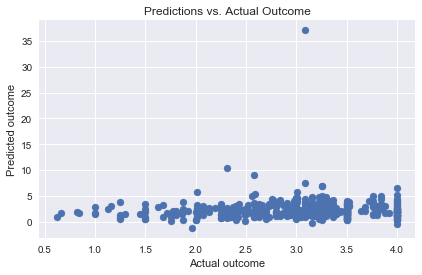

In [362]:
y_predicted = lm3_fit.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.title('Predictions vs. Actual Outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

#### Residual Histogram

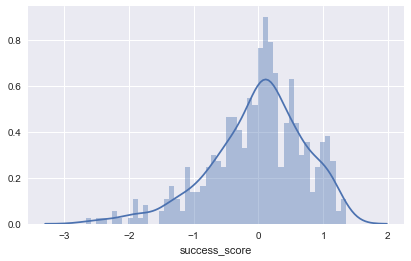

In [363]:
#residuals normal distributed
sns.distplot((y_test-predictions),bins=50);


Text(0,0.5,'Residuals')

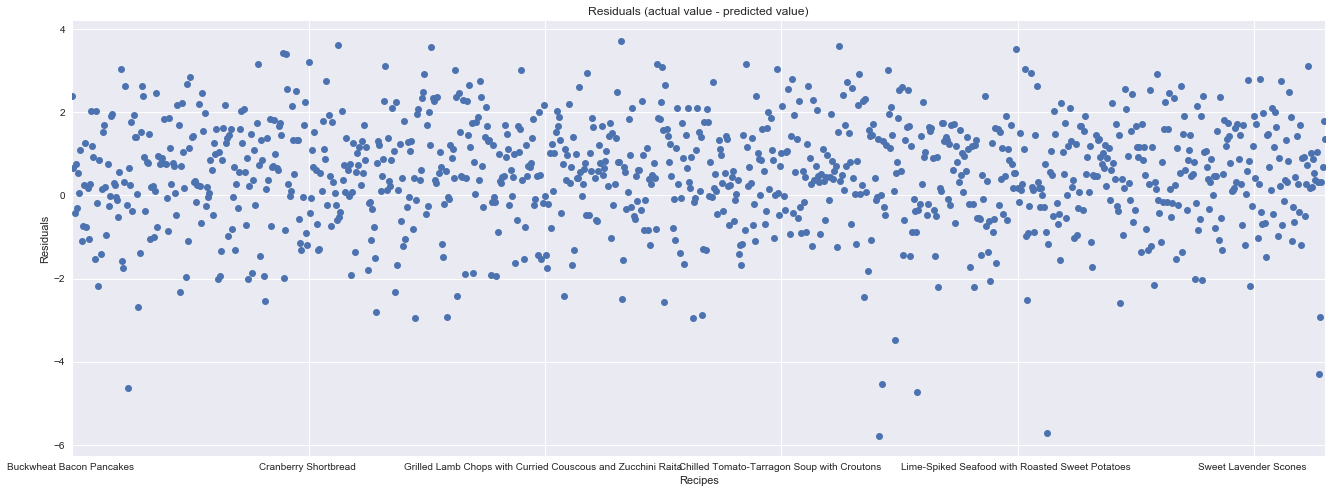

In [372]:
#homoscedasticity
lm3_fit.resid.plot(style='o', figsize=(20,8))
plt.title('Residuals (actual value - predicted value)')
plt.xlabel('Recipes')
plt.ylabel('Residuals')

## Cross-validation

In [490]:
X = df.drop(['rating','success_score','url'], axis =1)
y = df['success_score']

In [491]:
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv = 5)
print (scores, scores.mean())

[-0.00464247 -0.20905929 -0.54031641 -0.41766252 -0.32304904] -0.298945943454


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


encv: alpha = 1e-07 mean squared error = 0.444047789874
encv: alpha = 1e-06 mean squared error = 0.444047795013
encv: alpha = 1e-05 mean squared error = 0.444048307882
encv: alpha = 0.0001 mean squared error = 0.444098646077
encv: alpha = 0.001 mean squared error = 0.447944134359
encv: alpha = 0.01 mean squared error = 0.488052084272
encv: alpha = 1 mean squared error = 0.49264063327
encv: alpha = 10.0 mean squared error = 0.504599352439
encv: alpha = 100.0 mean squared error = 0.504946867256
encv: alpha = 1000.0 mean squared error = 0.504946867256
encv: alpha = 10000.0 mean squared error = 0.504946867256
encv: alpha = 100000.0 mean squared error = 0.504946867256
encv: alpha = 1000000.0 mean squared error = 0.504946867256
encv: alpha = 10000000.0 mean squared error = 0.504946867256
rcv: alpha = 1e-07 mean squared error = 0.444047789822
rcv: alpha = 1e-06 mean squared error = 0.444047789822
rcv: alpha = 1e-05 mean squared error = 0.444047789822
rcv: alpha = 0.0001 mean squared error = 0

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0.5,1,'MSE vs log(Alpha)')

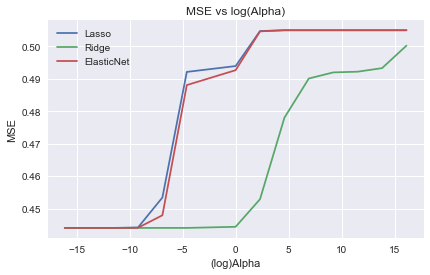

In [495]:

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])



alphas = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1,1e1,1e2,1e3,1e4,1e5,1e6,1e7]
enmse = []
for a in alphas:
    encv = ElasticNetCV(cv = 10, alphas =[a])
    encv.fit(X,y)
    enmse.append(mean_squared_error(y,encv.predict(X)))
    print('encv: alpha =',a, 'mean squared error =',mean_squared_error(y,encv.predict(X)))
    
rmse = []
for a in alphas:
    rcv = RidgeCV(cv = 10, alphas =[a])
    rcv.fit(X,y)
    rmse.append(mean_squared_error(y,rcv.predict(X)))
    print('rcv: alpha =',a, 'mean squared error =',mean_squared_error(y,rcv.predict(X)))
    
lmse = []
for a in alphas:
    lcv = LassoCV(cv = 10, alphas =[a])
    lcv.fit(X,y)
    lmse.append(mean_squared_error(y,lcv.predict(X)))
    print('lmse: alpha =',a, 'mean squared error =',mean_squared_error(y,lcv.predict(X)))
    
plt.figure(figsize=(20,10))    
fig, ax = plt.subplots(1,1)
ax.plot(np.log(alphas),lmse, label='Lasso')
ax.plot(np.log(alphas),rmse, label='Ridge')
ax.plot(np.log(alphas),enmse, label = 'ElasticNet')
leg = plt.legend(loc='upper_left', fancybox=True)
plt.xlabel('(log)Alpha')
plt.ylabel('MSE')
plt.title('MSE vs log(Alpha)')

The option that minimize the MSE is Ridge Regularization with alpha = 0.0001

### Ridge Regularization alpha = 0.0001

In [456]:
X = df.drop(['rating','success_score','url','reviews_count'], axis =1)
y = df['success_score']
from sklearn.linear_model import Ridge
rcv = Ridge(alpha=0.001)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


rcv.fit(X_train,y_train)
predicts = rcv.predict(X_test)
rcv.score(X_test, y_test)

-0.020479418903678992

Text(0,0.5,'Predicted outcome')

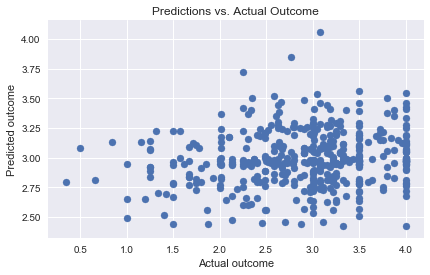

In [457]:
y_predicted = rcv.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.title('Predictions vs. Actual Outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

In [447]:
coeff_df = pd.DataFrame(rcv.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
calories,0.000040
carbohydrates,-0.000883
protein,0.001313
cholesterol,-0.000114
sodium,0.000029
cooking_time,-0.000173
Egg,-0.130478
Pork,-0.253099
Parmesan,0.053363
Herb,0.194283
